## Session 2: Brief Review of Thermodynamics for Batteries

### Recap of Session 1

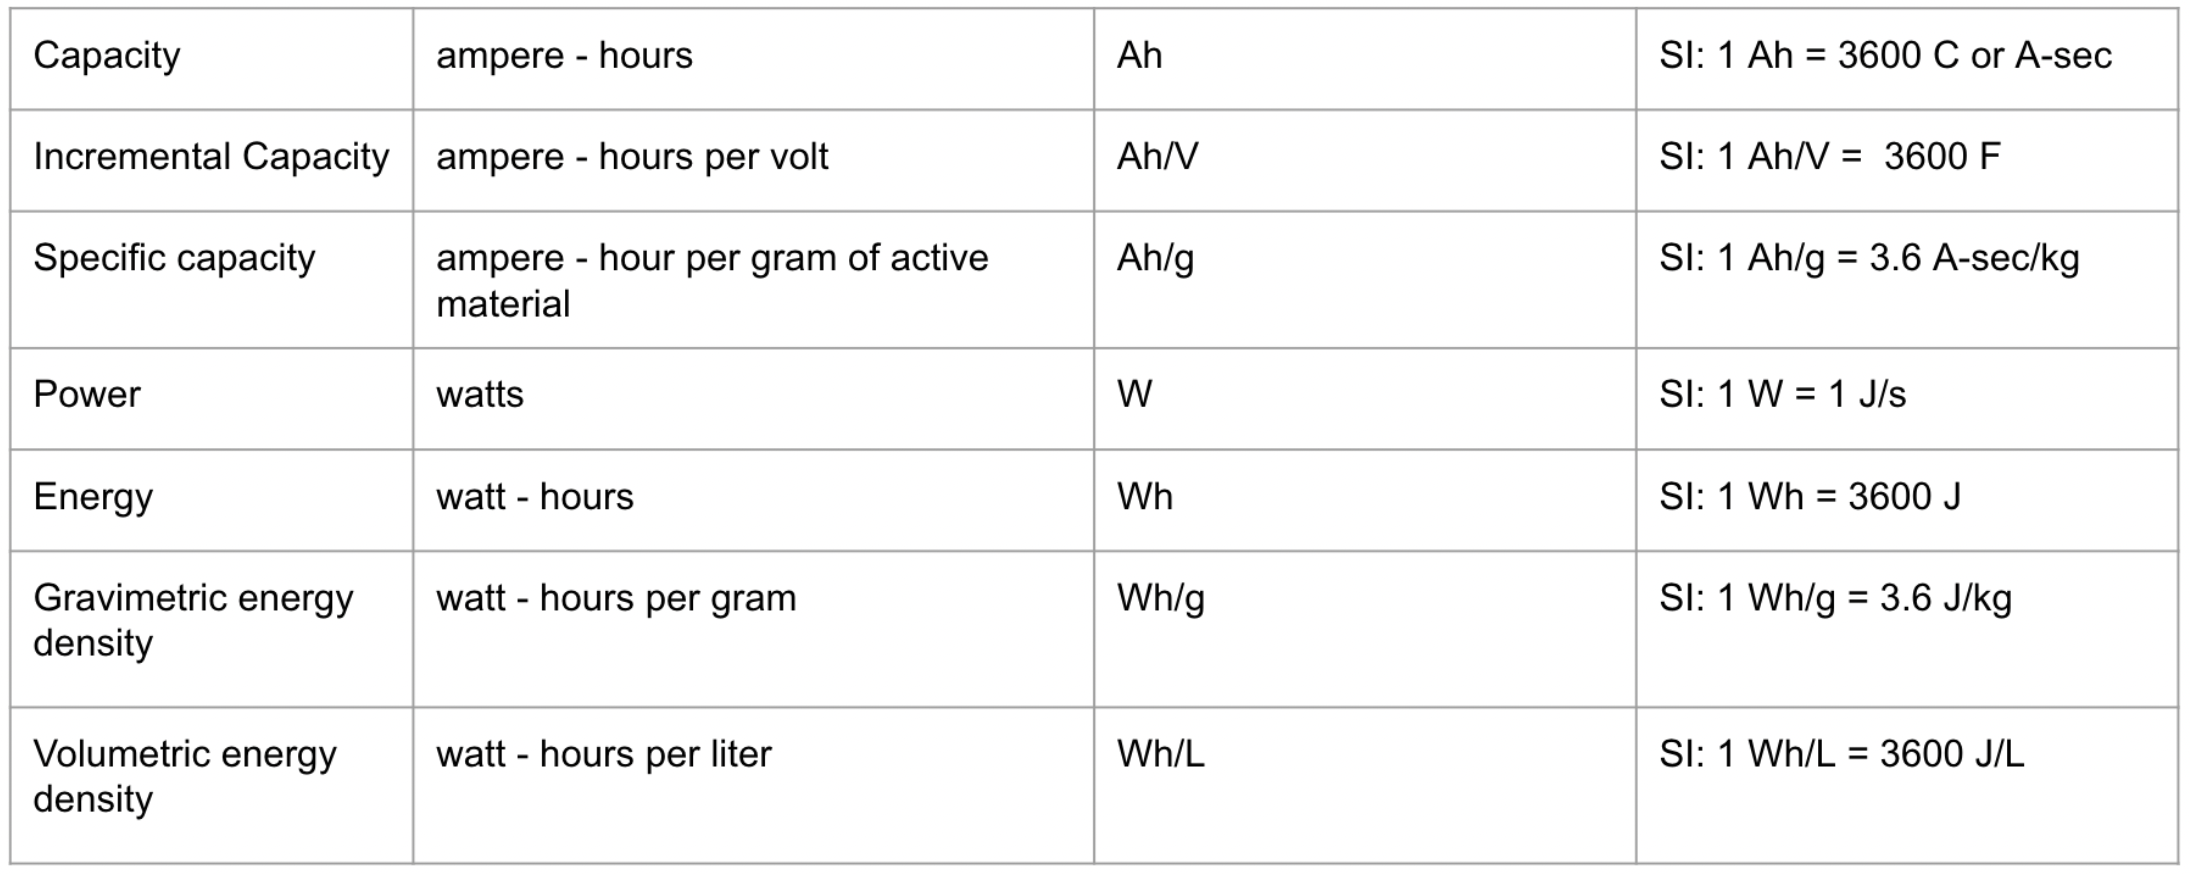

The capacity is the number of moles associated with complete discharge of the cell (units of ampere-hours). The practical capacity is always lower than the theoretical capacity because of polarization losses. 

The "specific capacity" is the capacity divided by the mass (ampere - hours per gram).

- Theoretical specific capacity of graphite = 372 mAh/g

- Why? 96485 C/mol * 1 ampere * 1 hour / 3600 Coulomb / (6*12g/mol) = 372 mAh/g for graphite (C6)

- 96485 C/mol * 1 ampere * 1 hour / 3600 Coulomb / (6.941 g/mol) = 3861.3 mAh/g for lithium metal

C-rate: Battery-specific terminology for charge rate. 1C is equivalent to a full charge in 1 hour. C/2 is equivalent to a full charge in 2 h. Example: if a cell has a total capacity of 2.6 ampere-hours, then a 1C rate is equivalent to a charge at 2.6 amps, resulting in a full charge in one hour. 

Typically, Li-ion batteries are charged and discharged at C/20 during initial formation cycles. Laboratory tests are conducted at rates of C/10 to up to 1C. EVs can be fast charged at rates of up to 1C. Research is being done to try and increase the charge rate to more than 3C (targeting 6C). Discharge rate capability is a little faster. 

State-of-charge (SOC) and state-of-health (SOH): SOC relates to how charged the battery is (0% SOC means it is fully discharged; 100% SOC means it is fully charged, and has been charged to its full capacity); should be based on a standardized test condition. SOH refers to how much capacity the battery is able to achieve, relative to an initial capacity (or the capacity at the same conditions; there are different ways of calculating SOC). With degradation, the battery will lose capacity and hence have a lower SOH. For instance, it is standard to consider replacement when a battery reaches 80% SOH (e.g. the warning sign comes up in your iPhones). The number of cycles it takes to reach 80% SOH is usually considered the "cycle life." 

Open-circuit-potential (OCP, or OCV): The state of the battery with no load (current or potential) applied.

### Electrostatics

First we'll talk about electrostatics, which describes the energy of electric charges, in the absence of chemical reactions. 

- Electric potential: the electrical work needed to move a charge a certain distance, divided by the amount of charge. 

- Coulomb’s law indicates that the attractive potential between two atoms is a function of their charge: $\phi\ = q
_1q_2/r$ (oppositely charged ions attract each other, resulting in a negative, attractive, potential; similarly charged ions repel each other, resulting in a positive, repulsive potential). 

- As two atoms (or similarly charged ions) get closer, they repel each other. The Pauli exclusion principle forbids two electrons from occupying the same space. This repulsive force varies exponentially with ionic separation. 

- The sum (net) potential indicates the ideal interatomic distance that balances attractive with repulsive interactions

- The electric potential involves the movement of charge from one location to another, without regard for the chemical environment, which becomes important in electrochemical cells. Therefore, the electrochemical potential is a combination of chemical and electric potential.

- The Fermi level is the thermodynamic work needed to add one electron to a solid-state body. It is a thermodynamic quantity, defined as the energy level of an electron that has a 50% probability of being occupied at any given time (electrons occupy certain ranges of energy levels). 

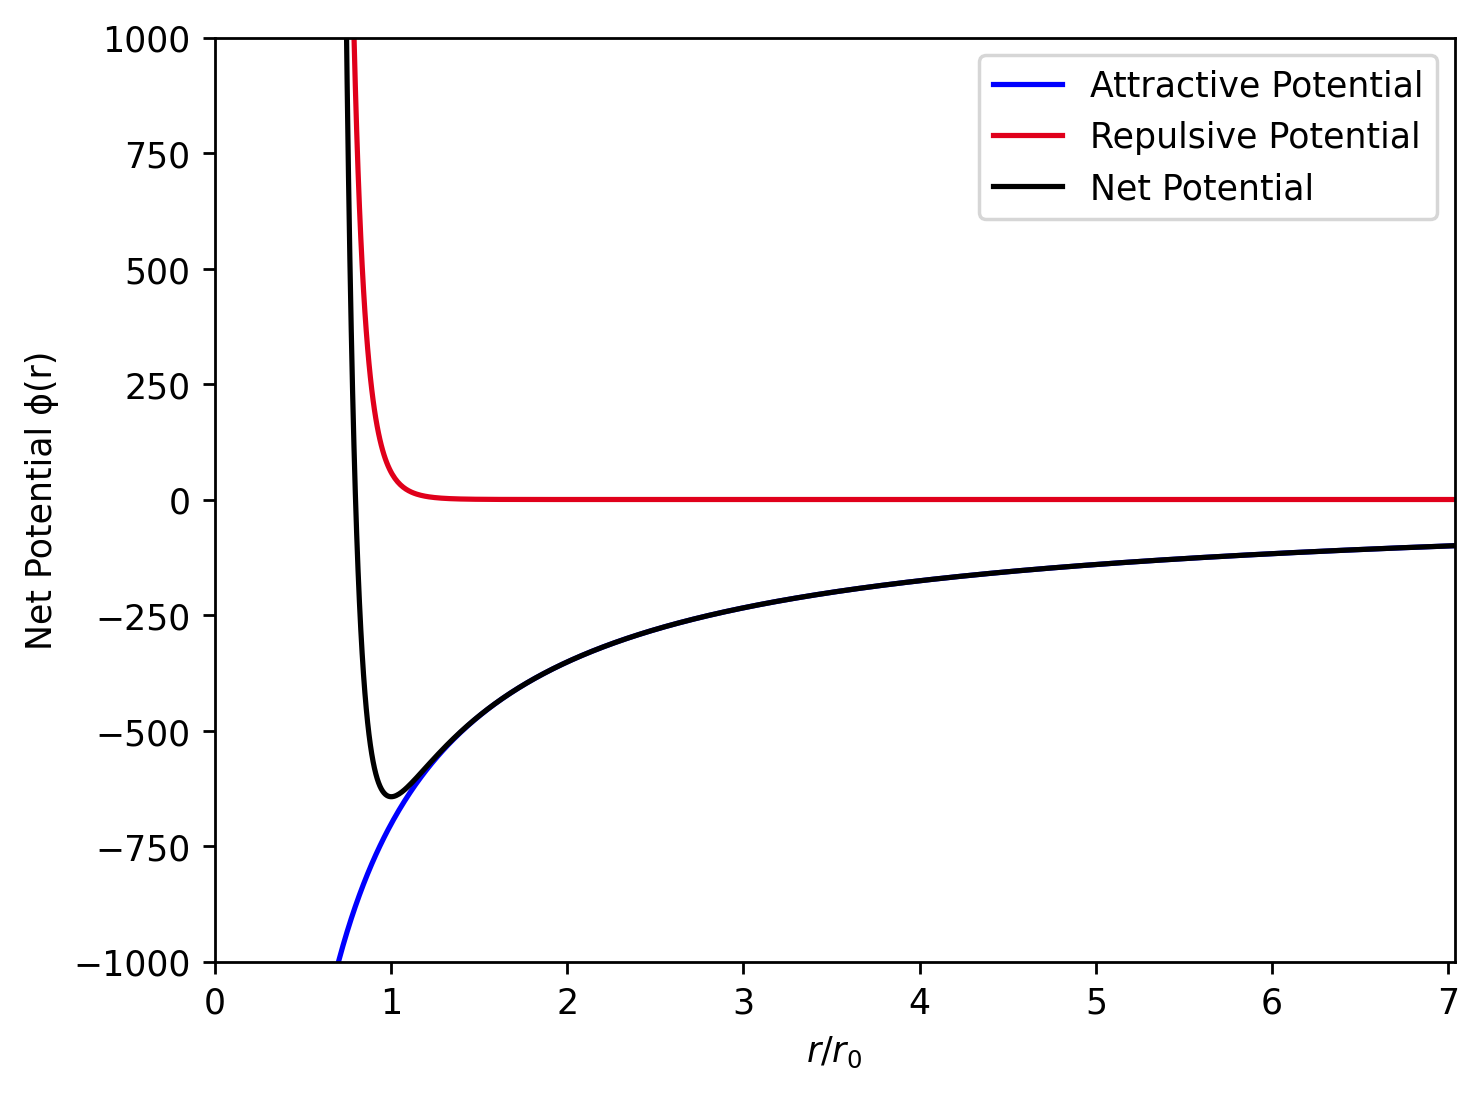

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

r1 = .01
r = np.linspace(0.0001, r1, 900) 

q1 = 1
q2 = -1
F_attractive = q1*q2/r

A = .002
F_repulsive = (A/r)**12
F_net = F_attractive + F_repulsive


r0 = r[np.argmin(F_net)] 

figure1 = plt.figure(dpi=250)

#Now Let's Plot
plt.plot(r/r0, F_attractive, label="Attractive Potential", color='b')
plt.plot(r/r0, F_repulsive, label="Repulsive Potential", color = '#E0001B')
plt.plot(r/r0, F_net, label="Net Potential", color = 'k')
plt.xlim(0,max(r/r0))
plt.ylim(-1000,1000)
plt.legend()
plt.ylabel("Net Potential ɸ(r)")
plt.xlabel("$r/r_0$")
plt.show()

### The electrochemical potential
How is electrostatics related to the electrochemical potential? The electrochemical potential is the sum of the electrostatic potential and the chemical potential, and accounts for both the chemical reactions and the influence of electric charge. 

- By definition, the electrochemical potential is the partial molar Gibbs free energy of species i. It refers to the amount of work done to bring one mole of an ion from a standard state to a specified concentration and electric potential. 

$\overline{\mu}_i\ =\ \mu _i\ +\ z_i F \phi$

$\mu _i$ is the chemical potential of species i in J/mol ($\mu _i\ =\ \frac{\partial G}{\partial N_i}_{T,P}$)

$z_i$ is the ion charge, F is Faraday's constant, and $\phi$ the electrostatic potential

- The measured voltage of a given electrode is the difference in the electrochemical potential per charge between that electrode and a reference electrode. 

- The cell voltage is the difference between the two electrode potentials. You can measure this with a voltmeter (or multimeter). 

$E_{cell}\ =\ E_{cathode}\ -\ E_{anode}$

- The open circuit voltage (or open circuit potential, OCV or OCP) is the voltage with no load applied, and is related to the overall Gibbs free energy change. 

- The measured cell voltage is higher than the OCV on battery charge (positive overpotential), and lower than the OCV on battery discharge (negative overpotential). 

- Thermodynamics dictates the theoretical bounds of an electrochemical system. When a battery stops charging or discharging, it is held at OCV. Sometimes, it takes a long time for the battery to reach its true OCV, where it is at thermodynamic equilibrium (completely zero net flow of ions, heat, or any other macroscopic entity).

### Standard reduction potentials

Usually, we talk about electrochemical potentials using standard reduction potentials, which are relative measurements using a standard reference. 

- The standard reduction potential is defined as the potential at which a given species tends to be reduced. For instance, the reduction of a lithium ion to lithium metal (gains an electron) occurs at -3.04 V versus the standard hydrogen electrode.

- The standard hydrogen electrode (SHE) is a typical reference. 

- Another example, $F_2$ is a strong oxidizer (+2.87 V versus SHE), so it tends to be reduced to $F^-$. On the other hand, Li is at the most negative reduction potential, so it tends to lose an electron and become $Li^+$ (so lithium is a strong reducing agent, and will readily donate an electron to another species). 

- Why don't we just take the lowest and highest standard potentials and build a battery with those reaction species? (lithium and fluorine)

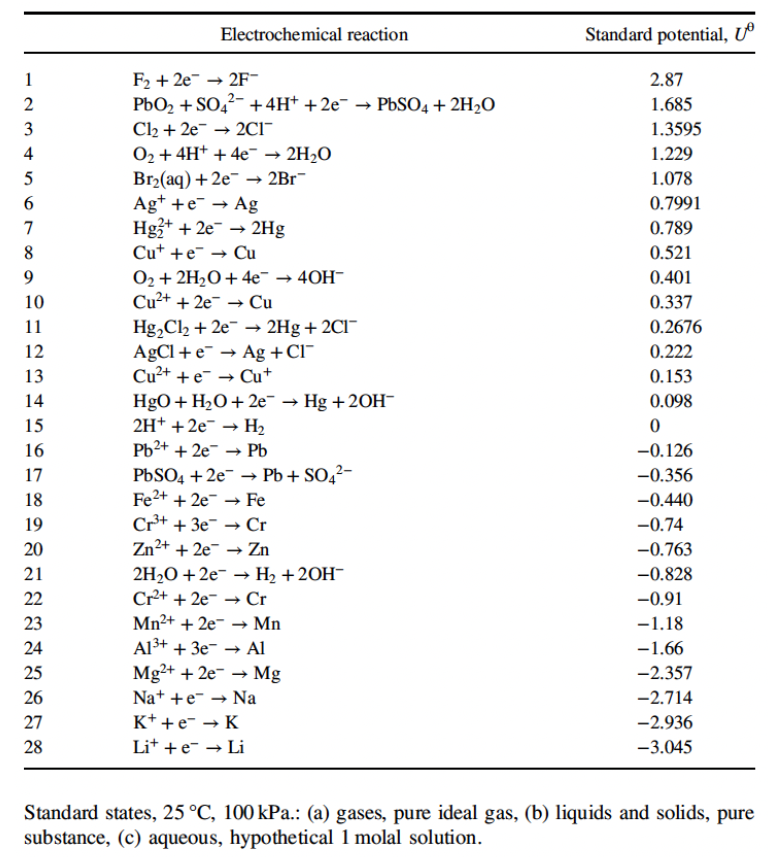

### Nernst equation

How do we relate the electrode potential that is measured, to concentrations of species involved in reactions? 

Consider a simple reaction that occurs on the surface of an electrode: $O\ +\ ne^-\ \rightleftharpoons \ R$ and is at equilibrium (thermodynamically reversible). 

By convention, we relate a positive cell potential to spontaneous reactions (negative Gibbs free energies):

$\Delta G\ =\ -nFE_{rxn}$

Recall the Gibbs free energy is also related to the equilibrium constant of a reaction: $\Delta G\ =\ -RT ln(K_{rxn})$

Example: now consider the case of $Cu^{2+}\ +\ 2e^-\ \rightleftharpoons\ Cu$

$E_{rxn}\ =\ E_{rxn}^0\ +\ \frac{RT}{nF} ln([Cu^{2+}])$ (the activity of a pure solid is 1, whereas the activity of a species in solution is dependent on its concentration in that solution)

$$\Delta G\ =\ -nFE_{rxn} $$

$$\Delta G^0\ =\ -nFE_{rxn}^0 $$ 

$$\Delta G\ =\ \Delta G^0\ +\ RT\ ln(\prod{a_i^{s_i}}) $$

The Gibbs energy of the reaction is related to the Gibbs energy change at standard conditions (25 degrees C, 1 bar), corrected for particular conditions of interest. This assumes we know the activity of each species and the stoichiometric coefficient of each species in the reaction (positive for products and negative for reactants). 

$$-nFE_{rxn}\ =\ -nFE_{rxn}^0\ +\ RT\ ln(\prod{a_i^{s_i}}) $$

$$E_{rxn}\ =\ E_{rxn}^0\ -RT/nF\ ln(\prod{a_i^{s_i}}) $$

We can take the one electron lithium reduction reaction as an example, where the activity of lithium metal is 1:

$$E_{rxn}\ =\ E_{rxn}^0\ -RT/nF\ ln(1/[Li^+])  $$ 

### Reference potentials

When testing batteries, we usually just measure the cell voltage, which is the difference in the two electrode potentials. It is not possible to determine the individual electrode potentials from the total cell voltage. To determine the individual electrode potentials, we'd need measure each with respect to a reference electrode. This is called a "three electrode cell". It's difficult to add such a reference electrode to an actual battery, so we usually implement this in R&D using a custom designed cell. Since many reference electrodes for aqueous systems are aqueous, we need some unique reference electrodes for the non-aqueous lithium batteries. It's common, for example, to measure an electrode potential versus a lithium metal reference. In this case, applying potentials below 0 V (versus Li/Li+) suggests we are plating lithium. 


### Thermodynamics of graphite negative electrodes

Recall: phase diagrams describe the equilibrium phase at a given temperature or pressure. For temperature-concentration plots, a binary phase diagram depicts the equilibrium phase across different compositions over a range of temperatures. 

For lithium insertion into graphite, $Li_xC_6$, a range of phases exists for 0 < x < 1. At low concentrations (i.e. discharged state of the battery), lithium intercalates randomly through the graphite ("stage 1"). As x > 0.04, lithium starts to intercalate into every 4th graphene sheet, and there is a phase transition from stage 1 to stage 4. Further transitions occur to stage 3, stage 2L and stage 2 and finally to a fully filled state (on average one lithium ion per six carbon atoms). (more in Session 5)

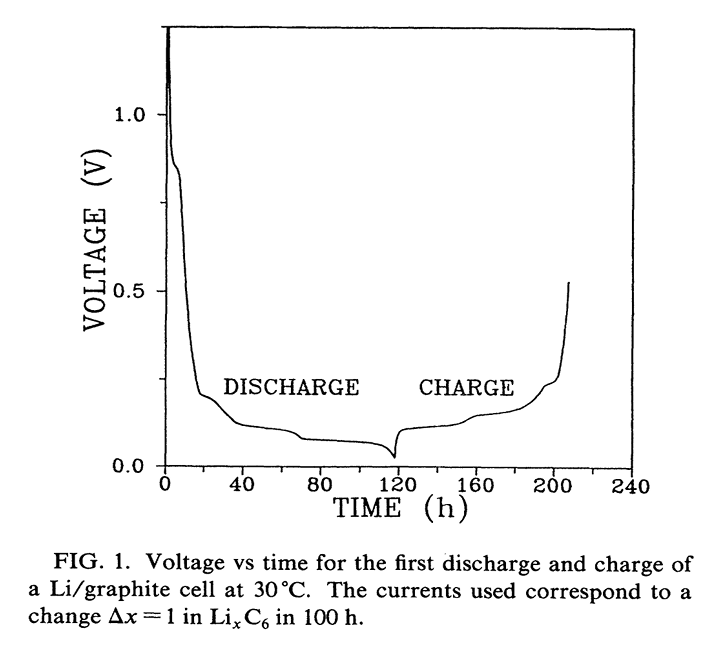

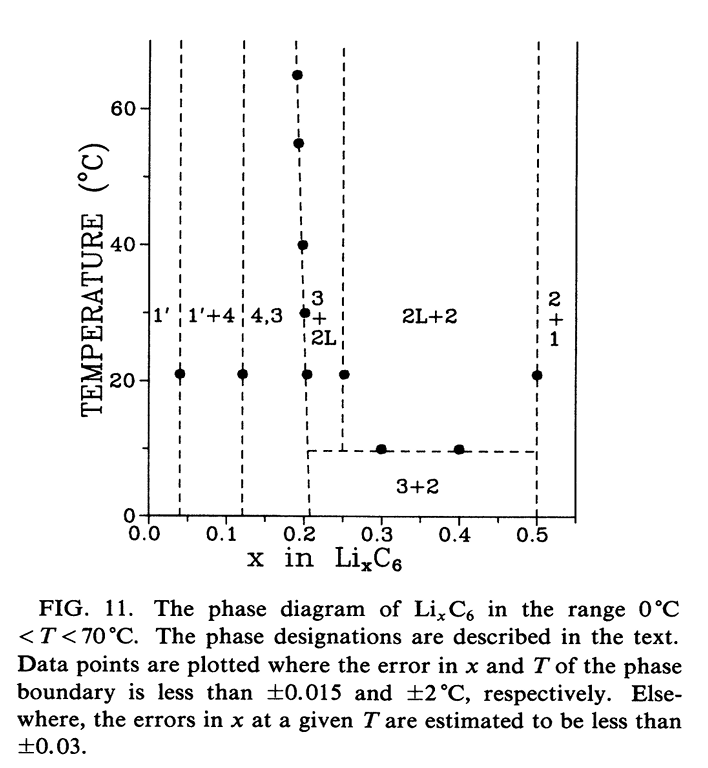

[ref: https://journals.aps.org/prb/abstract/10.1103/PhysRevB.44.9170]

The equilibrium phases can be measured if charging very slowly so that the electrode potential measurements reflect thermodynamic information (Nernstian behavior). Voltage change with lithiation can be predicted based on whether there is a single phase (solid solution) or a phase transformation (two phases are coexisting). In the latter case, the voltage profile is flat because the overall Gibbs free energy does not change. The below example shows how a hypothetical phase change can occur when a pure phase M is converted into a lithiated phase LiM. 

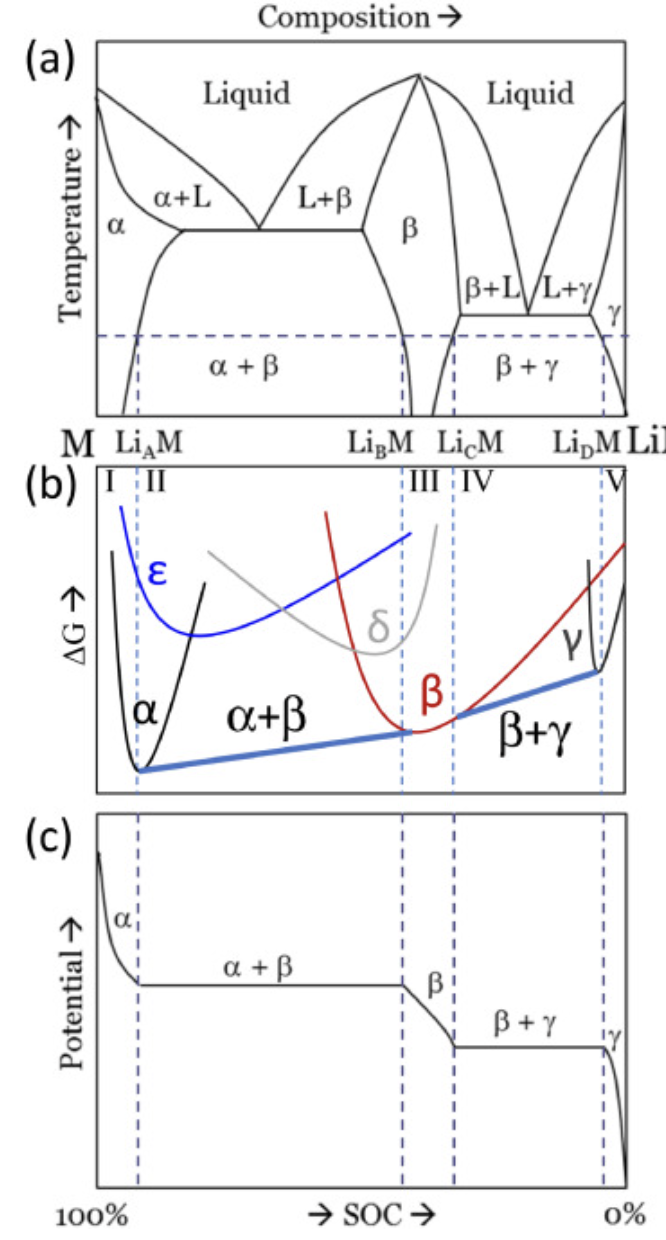

[ref: https://www.sciencedirect.com/science/article/pii/S0360128518300996?via%3Dihub#fig0003] 

The composition (x-axis) reflects the degree of lithiation, which is synonymous with state-of-charge (SOC). The thermodynamic definition of SOC is the ratio of remaining lithium intercalation sites versus the total number of sites. However, the practical measurement of SOC may not reflect the true thermodynamics, because batteries are charged and discharged to voltage cutoffs and not all sites are accessed. Therefore, SOC is often measured as the ratio of capacity remaining in a cell versus the obtainable capacity *in the same conditions* (same rates, temperatures, voltage cutoffs). Since the available / accessible capacity changes with cycling, then the SOC should also be altered to reflect the new reference.

The OCV vs SOC profile also changes with cycling, because of cell degradation. This is indicative of permanent structural change, which affects the thermodynamic state of the battery resulting in a different measured OCV. 

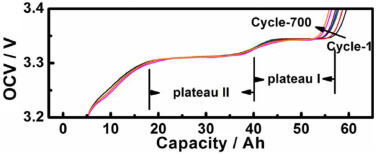

### Why lithium metal?

Lithium is the lightest metal with the lowest reduction potential of all metals (-3.04 V versus SHE). This means you can make a high voltage battery with it that is also energy dense. Compared with the other alkali metals, it's also the least reactive as the valence electron is close to the nucleus. For larger alkali metal atoms, the additional valence electrons are further from the nucleus and feel less electrostatic attraction to the nucleus, so, they are more willing to give up their electrons. Attempting to make a rechargeable sodium, potassium or magnesium metal battery has encountered many challenges with extreme reactivity (even more than lithium). 

Take a look at the periodic table. Why don't we then just make a 6+ V battery using lithium metal and fluorine? 


### Electrochemical stability windows

In most cases, a properly working electrolyte is expected to be non-reactive against both oxidation and reduction while the desired electrochemical redox reactions are occurring. The "electrochemical stability window" is the different in voltage within which no oxidation or reduction outside of the desired reactions occur at either the positive or negative electrodes. This guides the optimal voltage range for device operation. 

Estimating the window: cyclic or linear sweep voltammetry can be used to determine at what voltage surface oxidative or reductive decomposition of electrolyte occurs. An electrochemical cell can be devised with an ion-blocking (inert to charge transfer) electrode (i.e. Pt or Al) and the voltage sweeped. If a current is measured at high voltages, then we know there is some oxidative reaction occurring. 

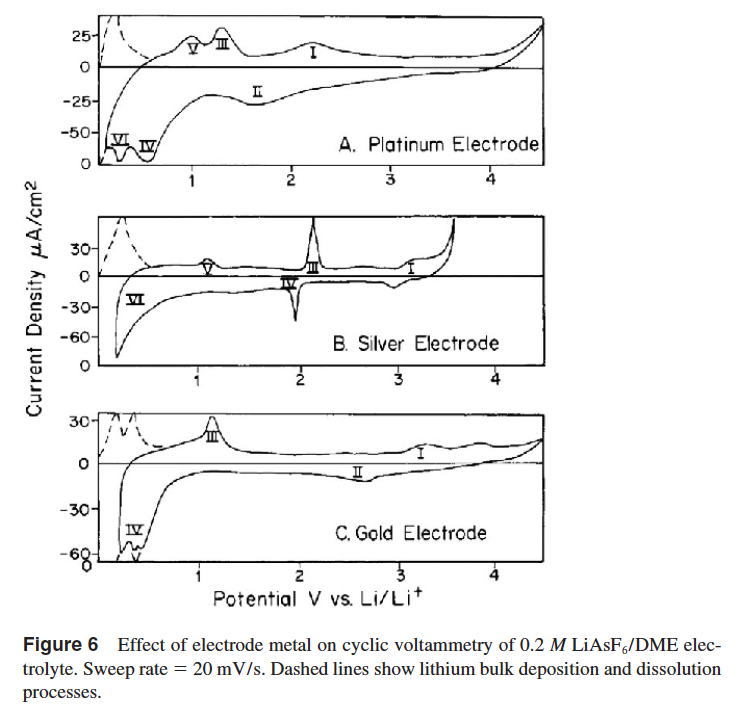

[ref: Aurbach, D., Nonaqueous Electrolytes]

It is worth mentioning that there are limitations to this estimation, since a working electrolyte should passivate the Al current collector, decomposition may not be observed until a very high voltage is reached. Further, as shown in the figure, using a working porous electrode results in much lower voltage decomposition than a metal electrode. Therefore, approach these results with an abundance of caution, as they may neglect true electrochemical conditions in a working cell.  

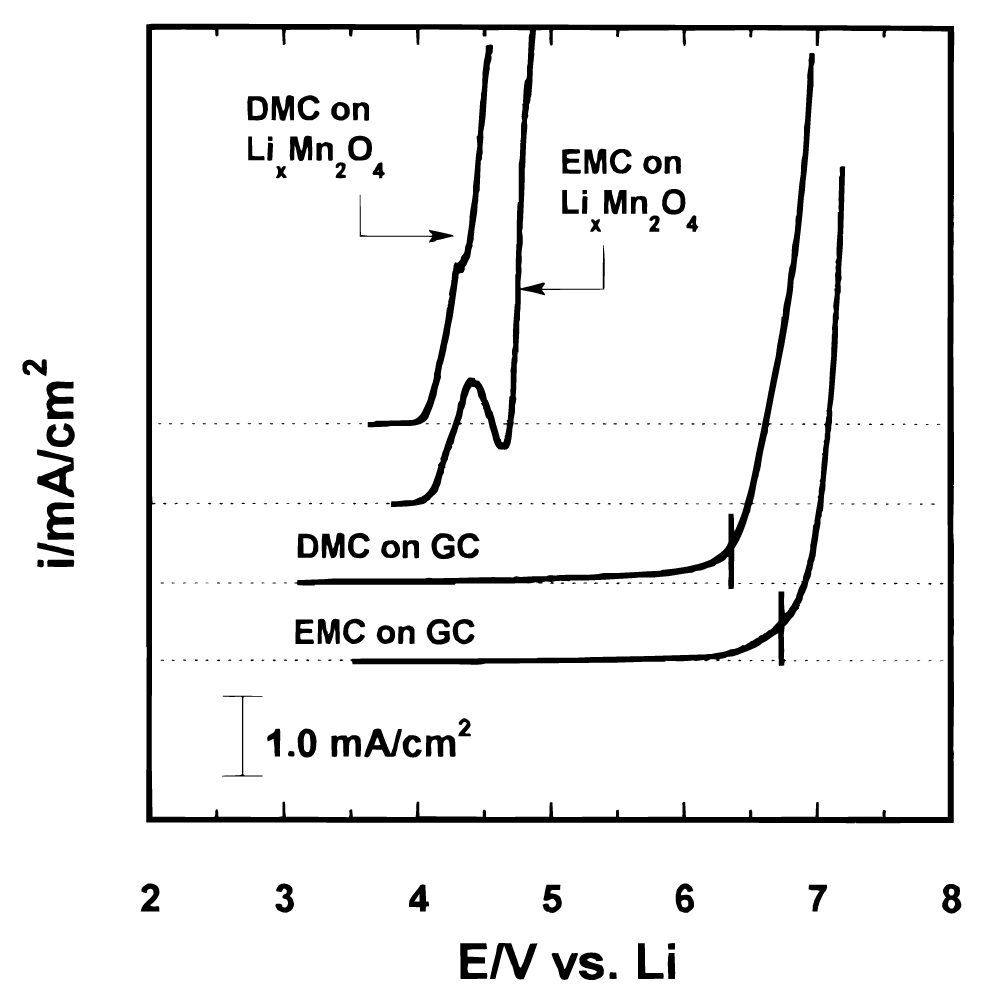

[ref: https://doi.org/10.1149/1.1392609]



As an example, calculated electrochemical stability windows for solid electrolytes for solid-state batteries (further discussed in Session 13) are shown below:

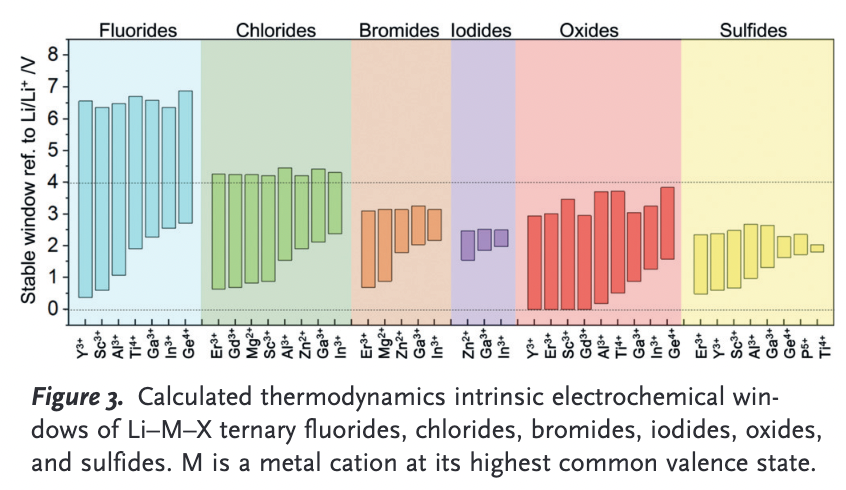

[ref: https://pubs.acs.org/doi/10.1021/jacsau.1c00228]



## Thermodynamics of positive electrodes

Consider a Li-ion battery with lithium cobalt oxide ($LiCoO_2$) positive electrode and graphite negative electrode.

On charge, lithium intercalates into the graphite electrode. This is written as the following two half reactions: $LiCoO_2\  \rightarrow\ Li_{1-x}CoO_2\ +\ xe^-\ + xLi^+$

$C_6\ +\ xe^-\ + xLi^+\ \rightarrow\ Li_xC_6$

where x < 0.55. If more lithium leaves LCO, it becomes unstable and evolves oxygen gas. 

Another common layered oxide is NMC, now used in many EV batteries.

$NiMnCoO_2\ +\ Li^+\ +\ e^-\ \rightarrow\ LiNiMnCoO_2$

Olivines are another type of positive electrode, a common one is lithium iron phosphate (LFP) which exhibits a flat voltage profile around 3.45 V versus Li/Li+. 

$FePO_4\ +\ Li^+\ +\ e^-\ \rightarrow\ LiFePO_4$

The thermodynamics of LFP vs NMC can be seen in OCV versus SOC plots. These are obtained by measuring the OCV at every state of charge by first charging to that SOC and then resting the battery until it reaches quasi-equilibrium. Depending on how the OCV is measured there may be an associated error. 

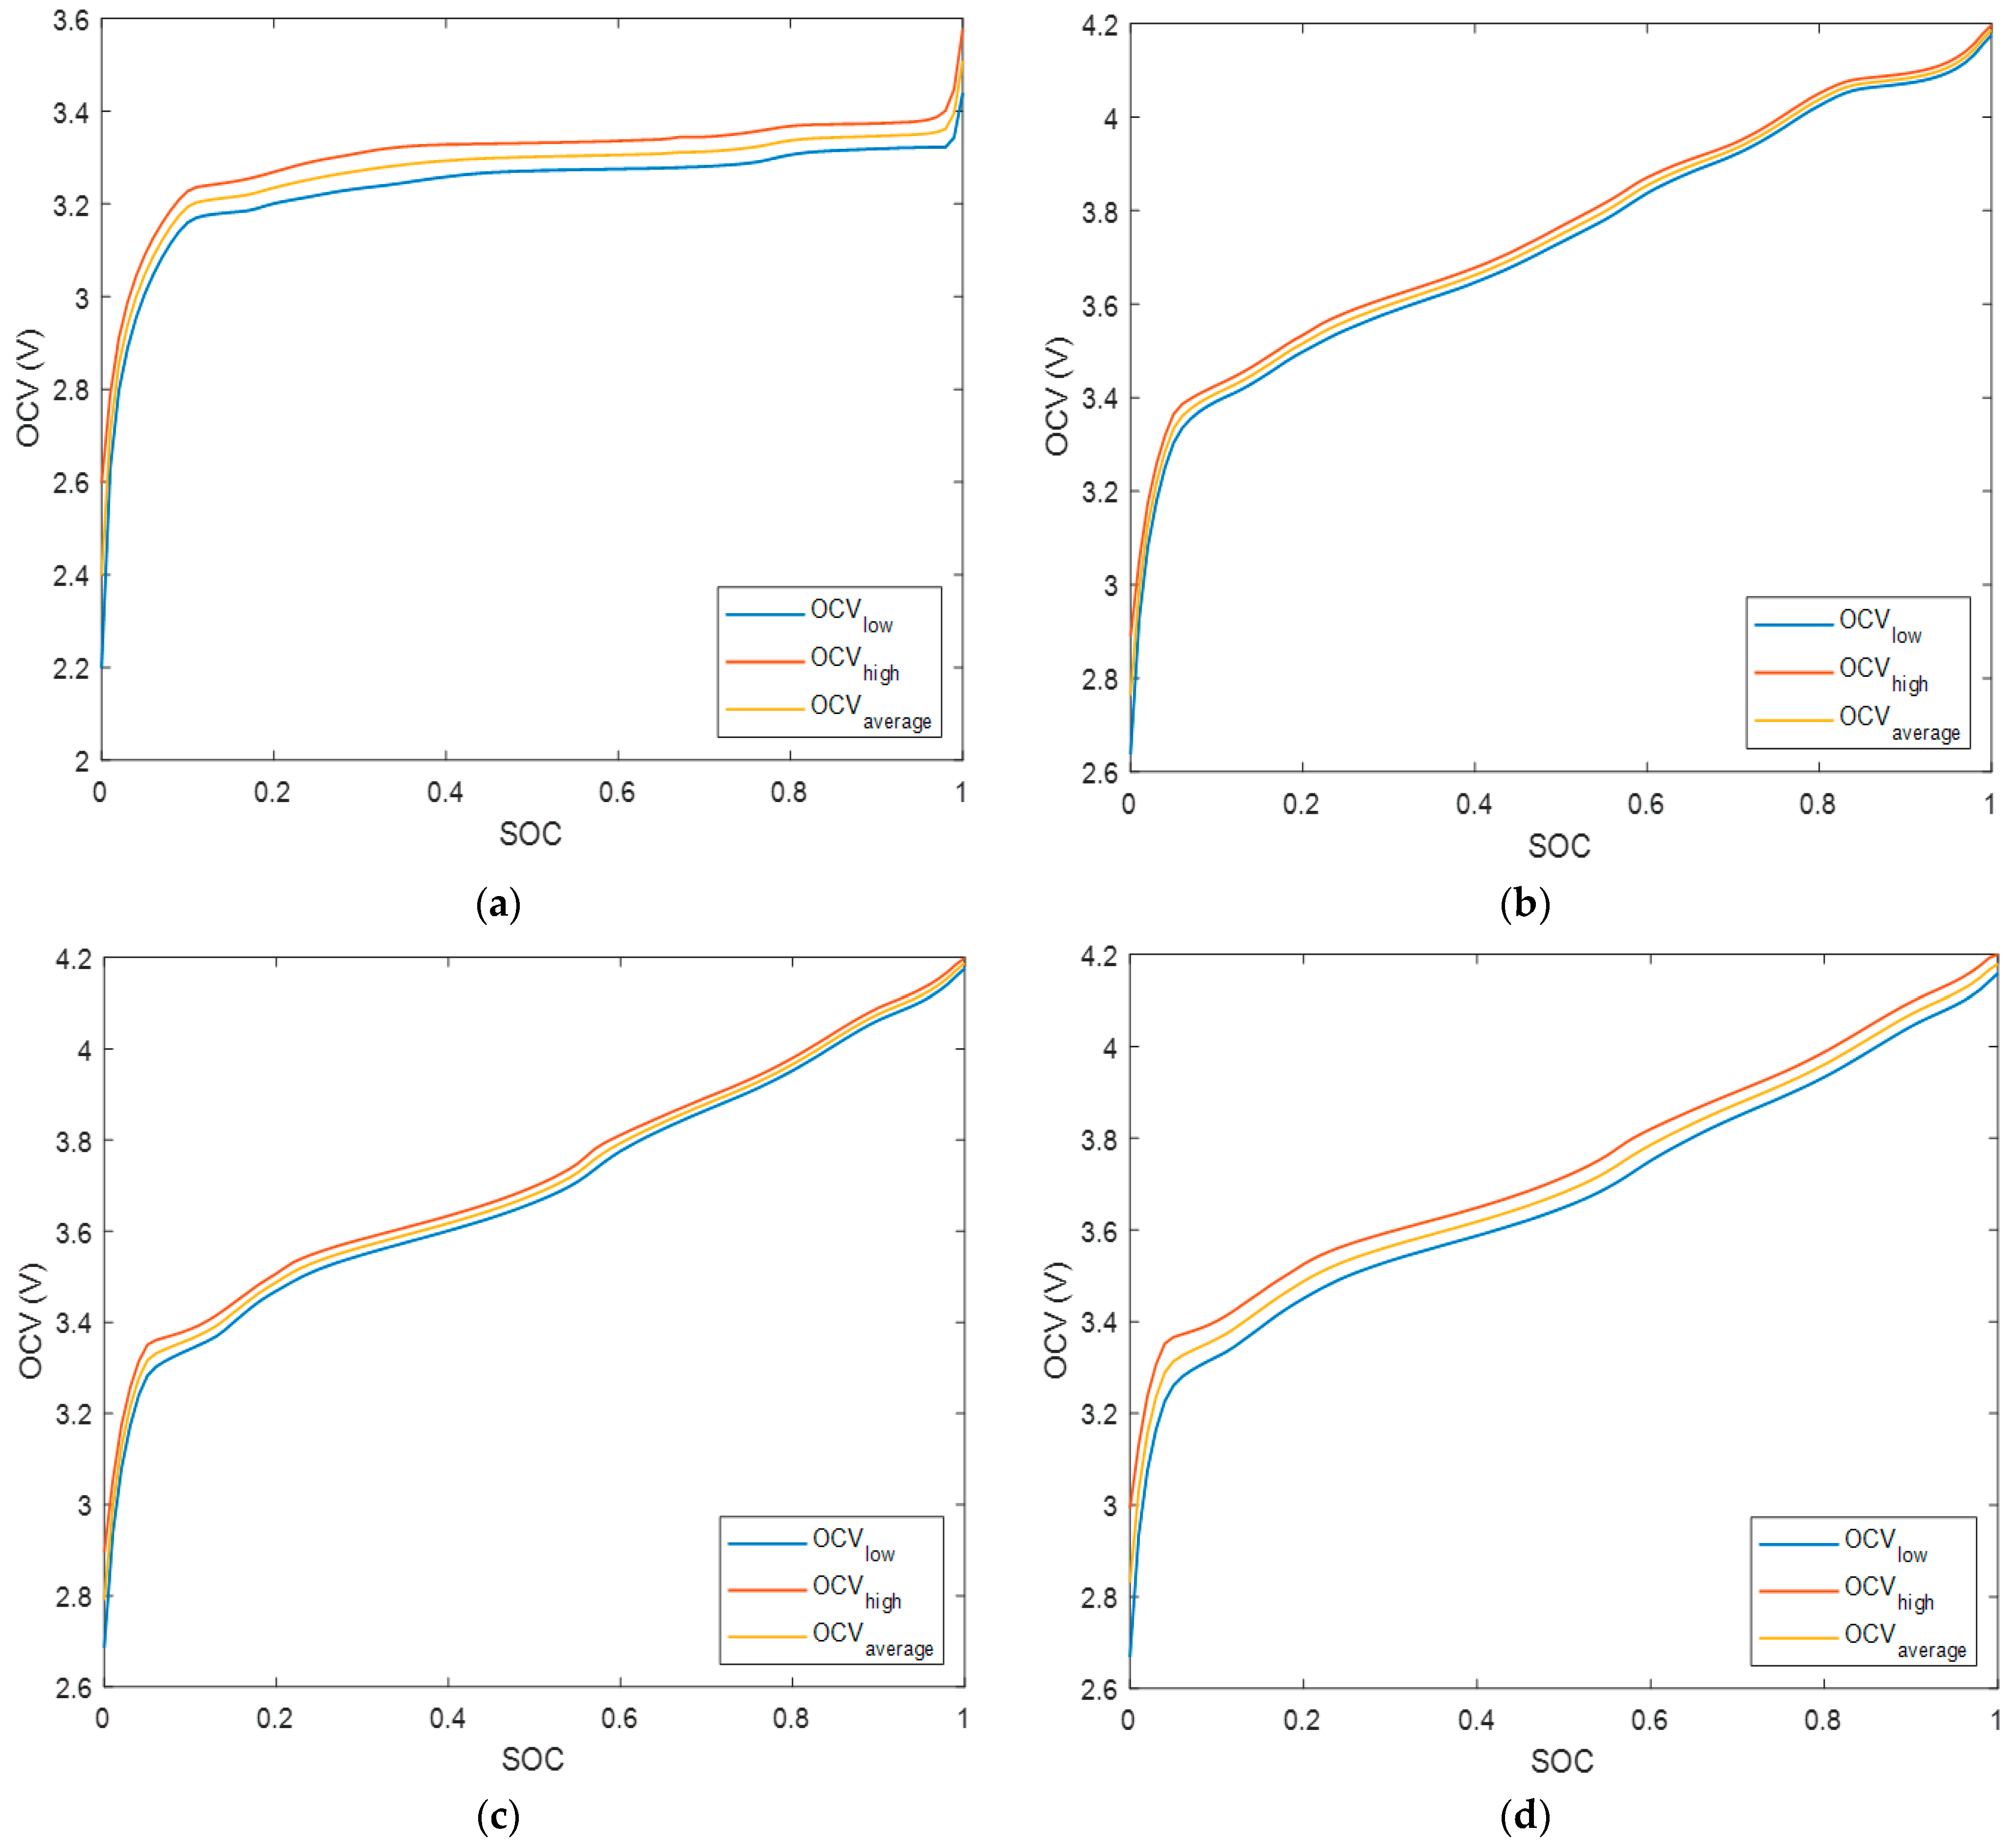

[ref: https://www.mdpi.com/2313-0105/7/3/51]

- LFP (top left) has a lower OCV at all SOCs versus other positive electrodes (NMC - top right, LMO - bottom left, NCA - bottom right). Remember that the full cell voltage measurement is a sum of both the positive and negative. Slight shifts in the voltage curve of LFP batteries in the two phase region are attributed to graphite phase transitions.  

- Batteries are dynamically changing - current rate and operation in various temperature conditions will impact the OCV significantly, and should be accounted for. 

- Recall that the OCV is synonymous with thermodynamic free energy; just as phase diagrams indicate changes in the preferred phase with temperature and composition, the OCV will similarly be affected by changes in composition (but regimes of phase coexistence may result in a flat OCV profile, such as LFP) 

** Summarize the graphite half cell and LFP/NMC half cell potentials over the full range of charge and discharge

### OCV Hysteresis

Based on the above definition, should the OCV curve generated in one direction (charge) be the same as the OCV generated in the other direction (discharge)? If the OCV is measured at equilibrium, direction should not matter. However, literature has reported instances where it does matter - and there is a hysteresis. Why is this the case? 

There are two possible causes.

First, if the hysteresis only exists in certain portions of SOC, it may be due to structural changes. For instance, LFP undergoes a "shrinking core" where the structure on charge is different than the structure on discharge. On charge, the outer Li rich phase converts into a Li poor inner phase. 

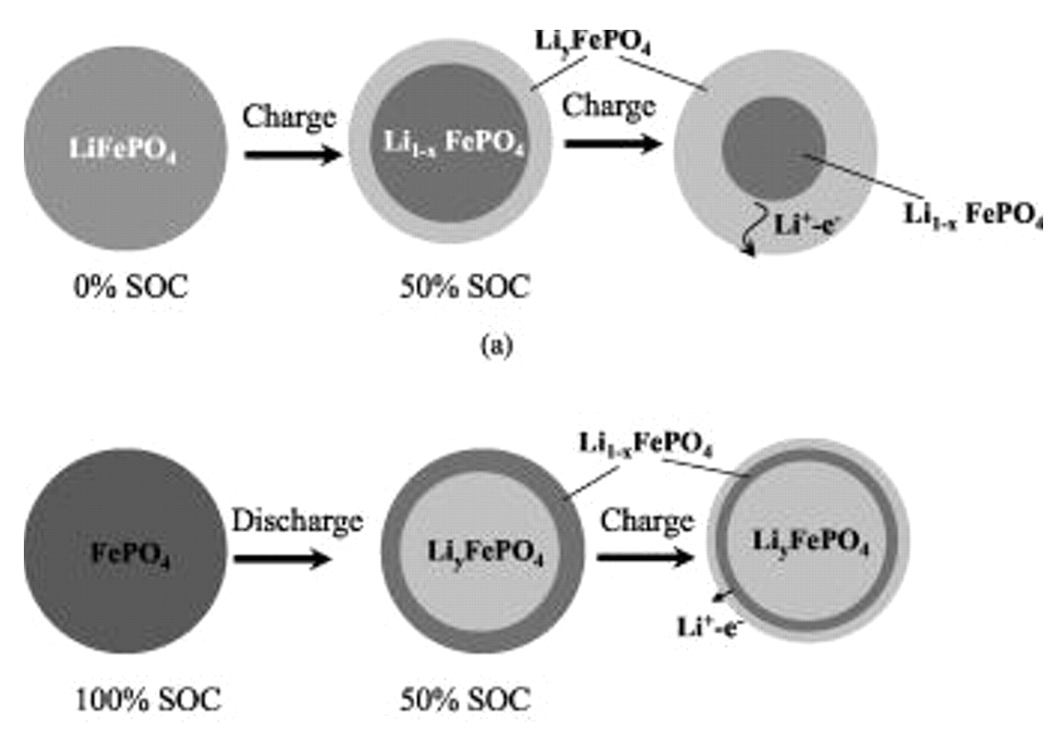

However, if there is a hysteresis throughout the entire SOC, there is a possibility that this is due to incorrect referencing (i.e. the curves are incorrectly shifted). This depends on how "0% SOC" is calculated. For instance in the figure below, the cell reached the minimum voltage cutoff, but a subsequent discharge showed that it had some remaining capacity left. 

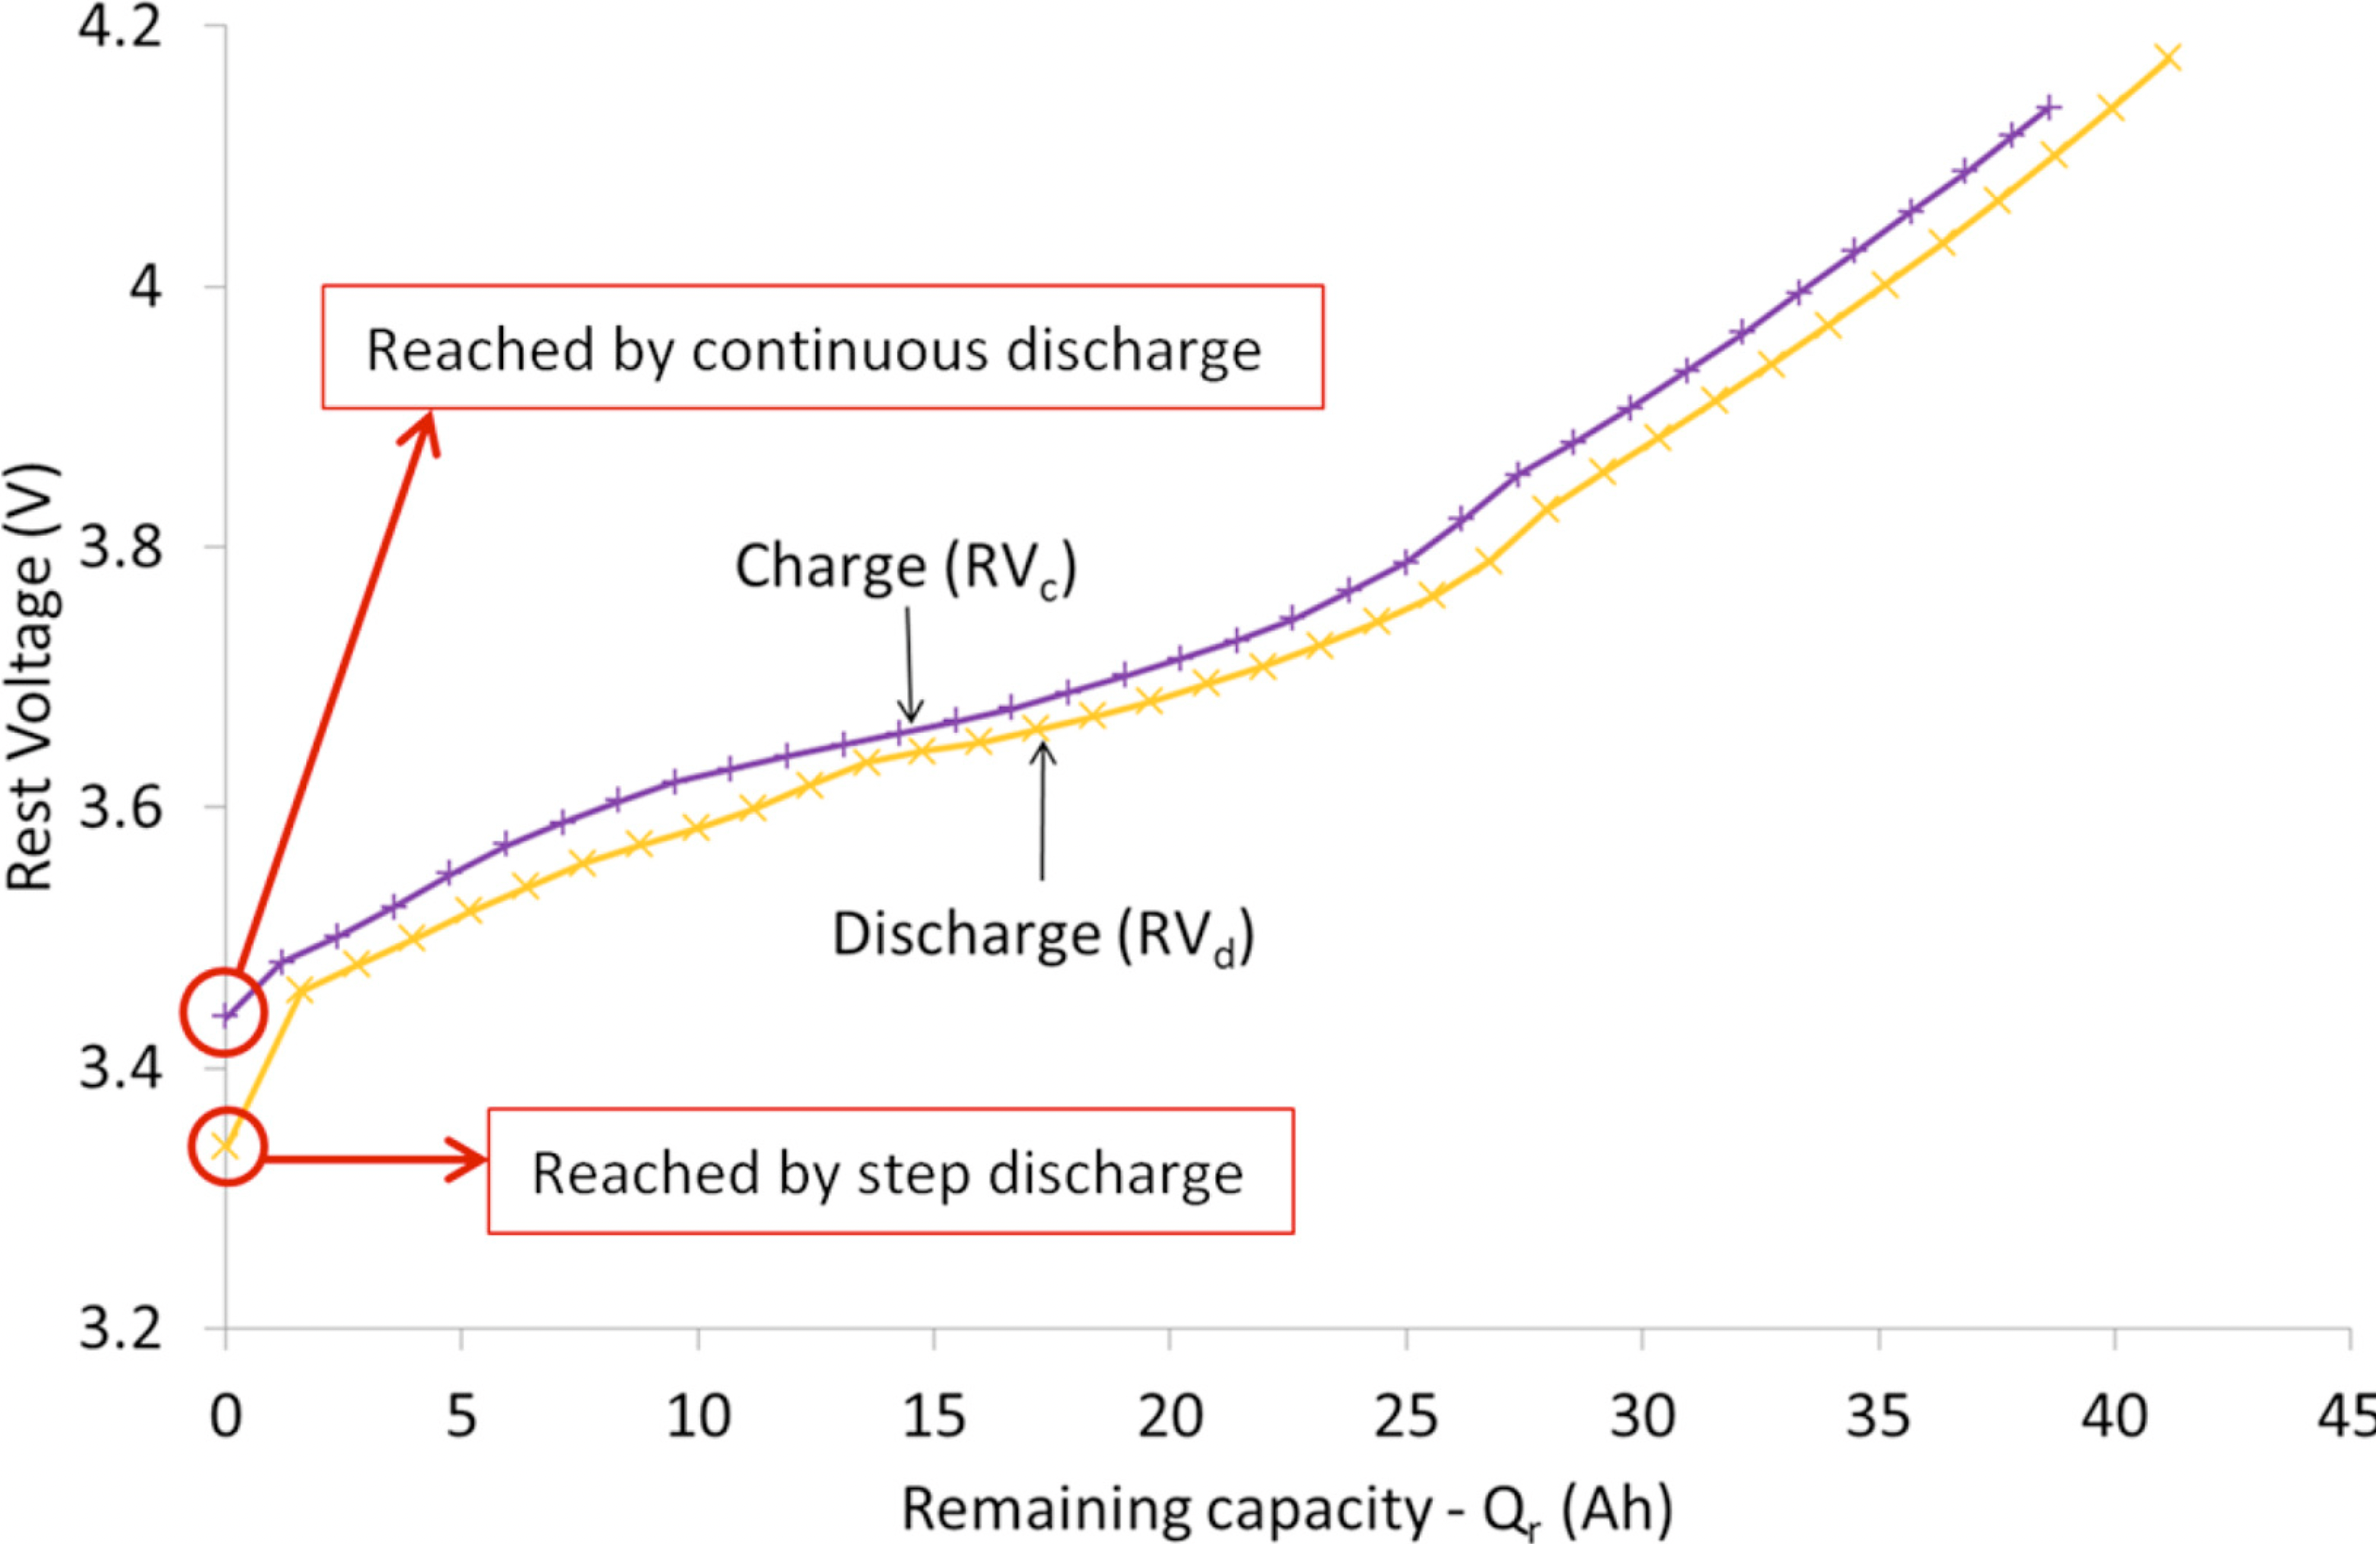

[ref: https://www.sciencedirect.com/science/article/pii/S037877531530029X#fig4]

Quiz 1: https://drexel.qualtrics.com/jfe/form/SV_1YBfukTEWVyKfWe 